# Assessing feature performance

DWPC = 0.4, computed on a subset of non-indications

In [3]:
import re

import matplotlib.pyplot
import pandas
import mpld3
import mpld3.plugins
import seaborn

%matplotlib inline

In [4]:
auroc_df = pandas.read_table('data/auroc.tsv')
metapath_df = pandas.read_table('data/metapaths.tsv')
metapath_df = metapath_df.rename(columns={'abbreviation': 'feature'})[['feature', 'length']]
auroc_df = auroc_df.merge(metapath_df)
auroc_df.head(2)

,feature_type,feature,nonzero,auroc,auroc_permuted,delta_auroc,pval_auroc,fdr_pval_auroc,length
0,DWPC,CbG<rG<rGaD,0.84185,0.64161,0.57490,0.066707,0.000064,0.001563,4
1,DWPC,CbG<rG<rGdD,0.37907,0.58289,0.55856,0.024336,0.000255,0.003079,4


## Performance by path length

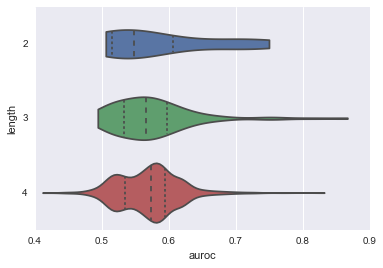

In [5]:
ax = seaborn.violinplot(x='auroc', y='length', data=auroc_df, cut=0, orient='h', inner='quartile')

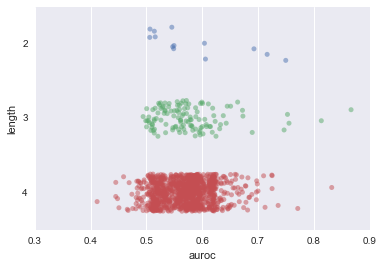

In [6]:
ax = seaborn.stripplot(x='auroc', y='length', data=auroc_df, jitter=0.25, orient='h', alpha = 0.5)

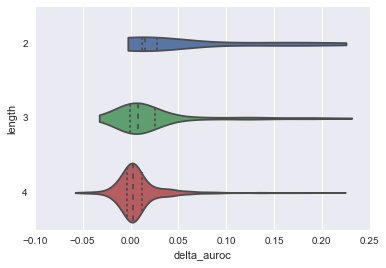

In [7]:
ax = seaborn.violinplot(x='delta_auroc', y='length', data=auroc_df, cut=0, orient='h', inner='quartile')

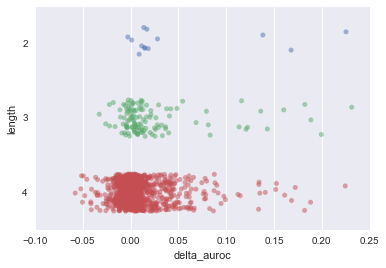

In [8]:
ax = seaborn.stripplot(x='delta_auroc', y='length', data=auroc_df, jitter=0.25, orient='h', alpha=0.5)

## Feature AUROC versus non-zero fraction

In [9]:
grid = seaborn.jointplot('nonzero', 'auroc', data=auroc_df, joint_kws={'alpha': 0.5})
points = grid.ax_joint.collections[0]
labels = auroc_df.feature.tolist()
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)
mpld3.plugins.connect(grid.fig, tooltip)
mpld3.display()

## Delta AUROC versus non-zero fraction

In [10]:
grid = seaborn.jointplot('nonzero', 'delta_auroc', data=auroc_df, joint_kws={'alpha': 0.5})
points = grid.ax_joint.collections[0]
labels = auroc_df.feature.tolist()
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)
mpld3.plugins.connect(grid.fig, tooltip)
mpld3.display()

## Delta-AUROC versus AUROC

In [11]:
grid = seaborn.jointplot('auroc', 'delta_auroc', data=auroc_df, joint_kws={'alpha': 0.5})
points = grid.ax_joint.collections[0]
labels = auroc_df.apply(lambda x: '{}: {:.1%} nonzero'.format(x['feature'], x['nonzero']), axis=1).tolist()
tooltip = mpld3.plugins.PointLabelTooltip(points, labels)
mpld3.plugins.connect(grid.fig, tooltip)
mpld3.display()

## Performance by Metaedge

In [23]:
metaedge_df = pandas.read_table('data/metaedge-in-metapath.tsv')
metaedge_df = metaedge_df.rename(columns={'metapath': 'feature'})
metaedge_df = metaedge_df[['feature', 'metaedge', 'metaedge_abbrev', 'position']]
metaedge_df = metaedge_df.merge(auroc_df)
metaedge_df.head(2)

,feature,metaedge,metaedge_abbrev,position,feature_type,nonzero,auroc,auroc_permuted,delta_auroc,pval_auroc,fdr_pval_auroc,length
0,CbGaD,Compound - binds - Gene,CbG,1,DWPC,0.31444,0.71627,0.57794,0.13832,0.000003,0.000257,2
1,CbGaD,Disease - associates - Gene,DaG,2,DWPC,0.31444,0.71627,0.57794,0.13832,0.000003,0.000257,2


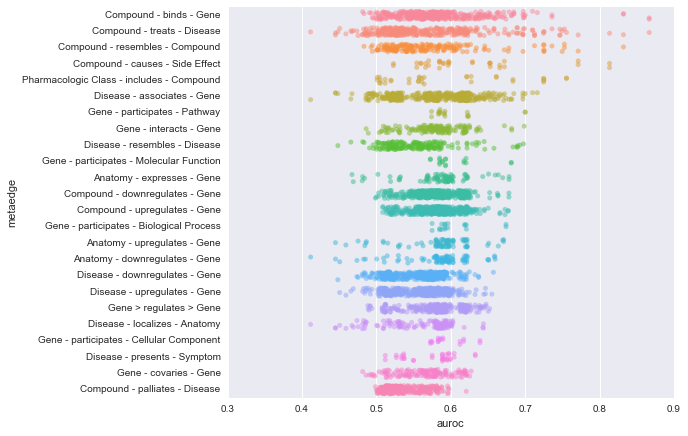

In [24]:
matplotlib.pyplot.figure(figsize=(8, 7))
order = metaedge_df.sort_values('auroc', ascending=False).drop_duplicates('metaedge').metaedge
ax = seaborn.stripplot(x='auroc', y='metaedge', data=metaedge_df, jitter=0.25, orient='h', alpha = 0.5, order=order)

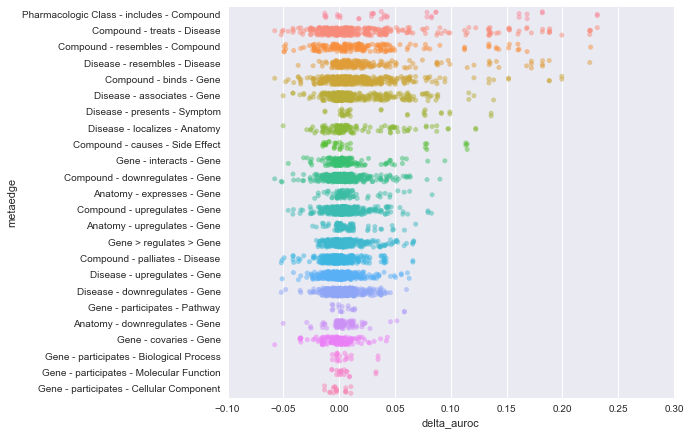

In [25]:
matplotlib.pyplot.figure(figsize=(8, 7))
order = metaedge_df.sort_values('delta_auroc', ascending=False).drop_duplicates('metaedge').metaedge
ax = seaborn.stripplot(x='delta_auroc', y='metaedge', data=metaedge_df, jitter=0.25, orient='h', alpha = 0.5, order=order)